In [10]:
import numpy
import sympy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16


from sympy import init_printing
init_printing()

from sympy.utilities.lambdify import lambdify

##parametres

T = 180
Vm = 1360/36
L = 11000
rhoM = 0.25
nx = 51
dt = 3.6
dx = L/(nx-1)
nt = round(T/dt)

In [11]:
##initial conditions
##x = numpy.linspace(0,L,nx)
##rho = numpy.ones(nx)*0.01
##rho[10:20] = 0.05


x = numpy.linspace(0,L,nx)
rho = numpy.ones(nx)*0.02 ##note this change
rho[10:20] = 0.05

In [12]:
for n in range(nt):  
    un = rho.copy() 
    rho[1:] = un[1:]-(1-2*un[1:]/rhoM)*dt/dx*Vm*(un[1:]-un[0:-1]) 
    ##rho[0] = 0.01
    rho[0] = 0.02
   ## V[0:] = Vm(1-rho[0:]/rhoM)

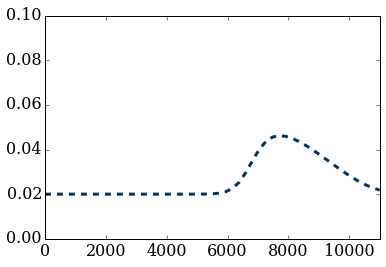

In [13]:
pyplot.plot(x, rho, color='#003366', ls='--', lw=3)
pyplot.ylim(0,0.1);
pyplot.xlim(0,11000);

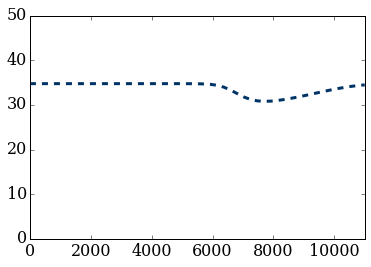

In [14]:
V = numpy.ones(nx)*Vm*(1-rho/rhoM)
pyplot.plot(x, V, color='#003366', ls='--', lw=3)
pyplot.ylim(0,50);
pyplot.xlim(0,11000);

In [15]:
print(V)

[ 34.75555556  34.75555556  34.75555556  34.75555556  34.75555556
  34.75555556  34.75555556  34.75555556  34.75555556  34.75555556
  34.75555556  34.75555556  34.75555556  34.75555556  34.75555556
  34.75555555  34.75555552  34.75555529  34.75555393  34.75554674
  34.7555133   34.75537431  34.75485358  34.75308115  34.74756277
  34.73176331  34.6900737   34.5891283   34.36861203  33.94950518
  33.2929716   32.4881409   31.73328456  31.18789247  30.88917608
  30.79441921  30.84447798  30.99238206  31.20668366  31.46694885
  31.7591409   32.07257794  32.39820303  32.72764694  33.05273279
  33.36526401  33.65707108  33.92036082  34.14840421  34.33649637
  34.48293352]


In [16]:
def summas(a):
    s = 0
    for x in a:
        s += x
    return s

# функция вычисления среднего арафиметического
def average(a):
    # используем определенную выше
    # функцию суммирования элементов массива
    return summas(a)/len(a)


In [17]:
print(average(V))

33.7651720983


In [18]:
print(min(V))

30.7944192091
